# $$Modelo:Exponential~ Smoothing$$


### $$Conceito:$$




As previsões produzidas usando métodos de suavização exponencial são médias ponderadas de observações passadas, com os pesos decaindo exponencialmente à medida que as observações "envelhecem". Em outras palavras, quanto mais recente a observação, maior o peso associado





Modelo de suavização exponencial trata a tendência presente na série





A suavização exponencial é um método de previsão de séries temporais para dados univariados.





Os métodos de suavização exponencial podem ser considerados uma alternativa à popular classe de métodos Box-Jenkins ARIMA para previsão de séries temporais.



-----------------------------------------------------------------------------------------------------------------------





### $$Tipos~de~ Suavização~ Exponencial:$$



**Existem três tipos principais de métodos de previsão de séries temporais de suavização exponencial:**



-----------------------------------------------------------------------------------------------------------------------





**Suavização Exponencial Simples:**





SES, é um método de previsão de séries temporais para dados univariados sem tendência ou sazonalidade.





Requer um único parâmetro, chamado alfa (a), também chamado de fator de suavização ou coeficiente de suavização.





Este parâmetro controla a taxa na qual a influência das observações em etapas anteriores decai exponencialmente. Alfa é geralmente definido como um valor entre 0 e 1. Valores grandes significam que o modelo presta atenção principalmente às observações mais recentes, enquanto valores menores significam que mais da história é levada em consideração ao fazer uma previsão.





Um valor próximo a 1 indica aprendizado rápido (ou seja, apenas os valores mais recentes influenciam as previsões), enquanto um valor próximo a 0 indica aprendizado lento (observações anteriores têm uma grande influência nas previsões).



-----------------------------------------------------------------------------------------------------------------------



**Suavização Exponencial Dupla (Holt):**



A suavização exponencial dupla é uma extensão da suavização exponencial que adiciona explicitamente suporte para tendências na série temporal univariada.





Além do parâmetro alfa para controlar o fator de suavização, um fator de suavização adicional é adicionado para controlar a deterioração da influência da mudança na tendência chamada beta (b).





O método suporta tendências que mudam de maneiras diferentes: um aditivo e um multiplicativo, dependendo se a tendência é linear ou exponencial, respectivamente.





- **A suavização exponencial dupla com uma tendência aditiva é classicamente chamada de modelo de tendência linear de Holt:**

    -**Tendência aditiva:** Suavização exponencial dupla com uma tendência linear.

    - **Tendência multiplicativa:** Suavização exponencial dupla com uma tendência exponencial.



-----------------------------------------------------------------------------------------------------------------------



**Suavização Exponencial Tripla (Holt-Winters):**



A suavização exponencial tripla é uma extensão da suavização exponencial Dupla que adiciona explicitamente suporte à sazonalidade e Tendência à série temporal univariada.





Esse método é também chamado de suavização exponencial de Holt-Winters





Além dos fatores de suavização alfa e beta, é adicionado um novo parâmetro chamado gama (g) que controla a influência no componente sazonal.





- **Como na tendência, a sazonalidade pode ser modelada como um processo aditivo ou multiplicativo para uma mudança linear ou exponencial na sazonalidade:**

    - **Sazonalidade aditiva:** suavização exponencial tripla com uma sazonalidade linear.

    - **Sazonalidade multiplicativa:** Suavização exponencial tripla com uma sazonalidade exponencial.



-----------------------------------------------------------------------------------------------------------------------

A suavização exponencial tripla é a variação mais avançada da suavização exponencial e, através da configuração, também pode desenvolver modelos de suavização exponencial dupla e única.

In [1]:
#Pacotes
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing 
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import math
from math import sqrt 
import sklearn
from sklearn.metrics import mean_squared_error 


#Bibliotecas para deixar o grafico maior

import matplotlib as m
# Imports para formatação dos gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

# Carregar os dados


In [2]:
#Instalando e importando a API no código
import yfinance as yf 

# escolhendo uma carteira fictícia para exemplificarmos conceitos
codigo = ['PETR4.SA']

# carregando dados do valor 
petr4 = yf.Ticker(codigo[0])

petr4 = petr4.history(start='2020-01-01', end='2022-04-26') 
petr4 = petr4.iloc[:,0:5]
petr4

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,20.339555,20.466219,20.206224,20.466219,37774500
2020-01-03,20.586218,20.826213,20.299559,20.299559,71595600
2020-01-06,20.286224,20.626216,19.966231,20.539551,81844000
2020-01-07,20.546217,20.586216,20.312888,20.459553,32822000
2020-01-08,20.459552,20.512884,20.159558,20.332888,48215600
...,...,...,...,...,...
2022-04-18,27.961805,28.168198,27.342625,27.566965,76350600
2022-04-19,27.961805,28.715589,27.925911,28.401512,88494100
2022-04-20,28.401512,28.670721,28.114356,28.536116,34694700


**Dados do valor da ação da petrobras, 572 linhas e 5 variáveis**

In [3]:
# Serie Temporal com os dados de maior alta do dia
petr4 = pd.DataFrame(petr4['High'])
petr4

,High
Date,
2020-01-02,20.466219
2020-01-03,20.826213
2020-01-06,20.626216
2020-01-07,20.586216
2020-01-08,20.512884
...,...
2022-04-18,28.168198
2022-04-19,28.715589
2022-04-20,28.670721


**Vamos trabalhar com a variável High, que indica o valor máximo de cada dia de operação**

In [4]:
# Tipos de dados
petr4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 572 entries, 2020-01-02 to 2022-04-25
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    572 non-null    float64
dtypes: float64(1)
memory usage: 8.9 KB


**Os dados já estão no formato de série temporal**

In [5]:
# Shape
petr4.shape

(572, 1)

**São 572 observações**

In [6]:
# Transformar o indice em coluna, para extrair as datas
petr4 = petr4.reset_index()
petr4

,Date,High
0,2020-01-02,20.466219
1,2020-01-03,20.826213
2,2020-01-06,20.626216
3,2020-01-07,20.586216
4,2020-01-08,20.512884
...,...,...
567,2022-04-18,28.168198
568,2022-04-19,28.715589
569,2022-04-20,28.670721
570,2022-04-22,28.087435


**Transformamos o índice ('Date') em coluna para conseguir analisar as datas em períodos diferentes**

In [7]:
# Vamos extrair os detalhes da coluna Date: ano, mês, dia 
petr4['ano'] = petr4.Date.dt.year
petr4['mes'] = petr4.Date.dt.month
petr4['dia'] = petr4.Date.dt.day
petr4 = petr4.set_index('Date')
petr4

,High,ano,mes,dia
Date,,,,
2020-01-02,20.466219,2020,1,2
2020-01-03,20.826213,2020,1,3
2020-01-06,20.626216,2020,1,6
2020-01-07,20.586216,2020,1,7
2020-01-08,20.512884,2020,1,8
...,...,...,...,...
2022-04-18,28.168198,2022,4,18
2022-04-19,28.715589,2022,4,19
2022-04-20,28.670721,2022,4,20


**Criando as variáveis: ano, mes e dia conseguimos extrair a granularidade máxima e tira insights dos dados**

In [8]:
# Tipos de dados
petr4.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 572 entries, 2020-01-02 to 2022-04-25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   High    572 non-null    float64
 1   ano     572 non-null    int64  
 2   mes     572 non-null    int64  
 3   dia     572 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 22.3 KB


**Dados no formato numérico**

In [9]:
# A variável High é nossa variável target 
target = petr4['High']

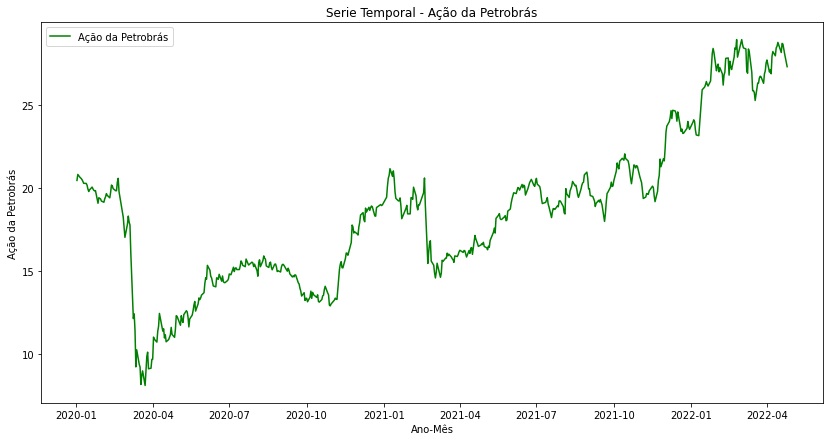

In [10]:
# Plot da Série Temporal
plt.figure(figsize=(14, 7))
plt.title("Serie Temporal - Ação da Petrobrás")
plt.plot(target, label = "Ação da Petrobrás", color = 'green')
plt.xlabel("Ano-Mês")
plt.ylabel("Ação da Petrobrás")
plt.legend(loc = "best");

**Série aparenta ter sazonalidade e tendência**

##  Decomposição da Série Temporal

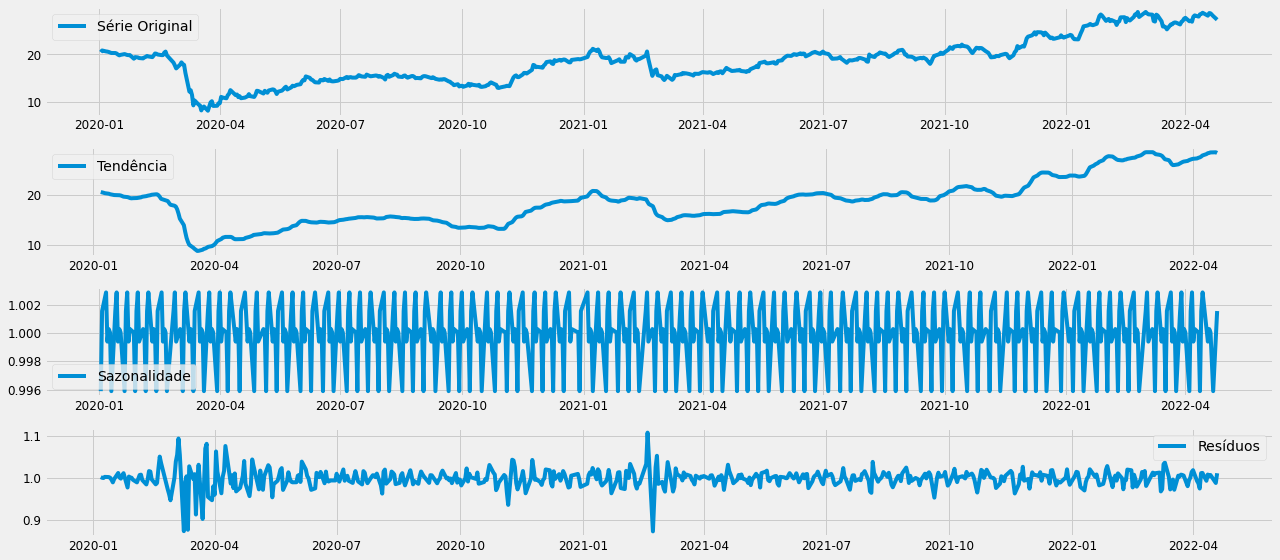

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

#Converter a data para datetime
target.index = pd.to_datetime(target.index, format="%m-%d-%Y")

#Transformar os dados em datafreme
a = pd.DataFrame(target)
decomposition = seasonal_decompose(a, model='multiplicative', period=6)

# Extraindo cada componente da série
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


# Plot
plt.subplot(411)
plt.plot(a['High'], label = 'Série Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Tendência')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal,label = 'Sazonalidade')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Resíduos')
plt.legend(loc = 'best')
plt.tight_layout()

**Note que há sazonalidade nos dados**

<AxesSubplot:xlabel='ano'>

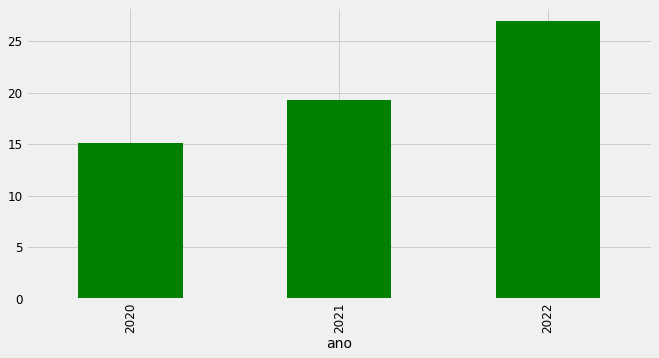

In [12]:
# Vamos criar um gráfico de barras com grafico por ano. 
plt.figure(figsize=(10, 5))
petr4.groupby('ano')['High'].mean().plot.bar(color = 'green')

**Tendência clara de alta**

<AxesSubplot:xlabel='mes'>

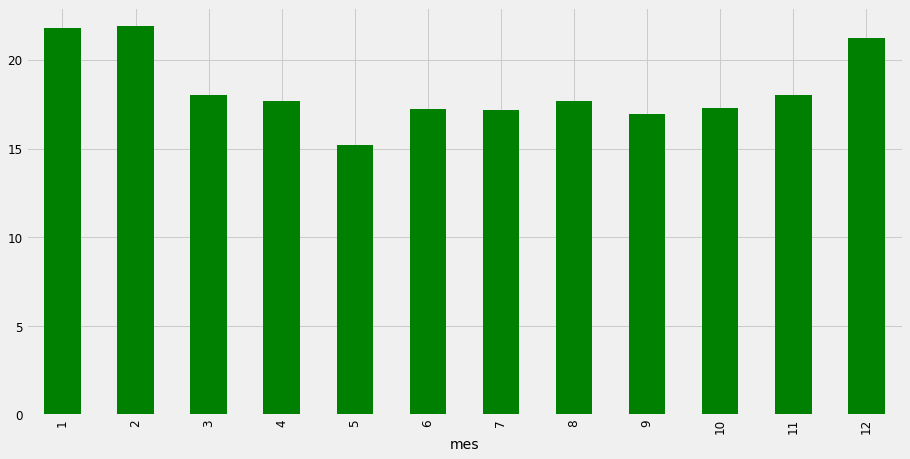

In [13]:
# Vamos criar um gráfico de barras por mês. 
plt.figure(figsize=(14, 7))
petr4.groupby('mes')['High'].mean().plot.bar(color = 'green')

**Os meses de dezembro a fevereiro tem o maior índice de alta**

<AxesSubplot:xlabel='dia'>

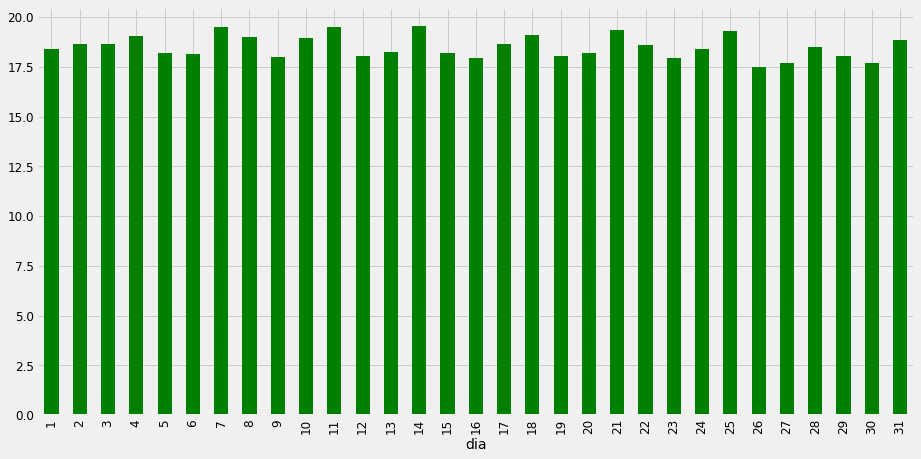

In [14]:
# A média diária 
plt.figure(figsize=(14, 7))
petr4.groupby('dia')['High'].mean().plot.bar(color = 'green')

**Os dias parecem ter uma oscilação pequena entre eles**

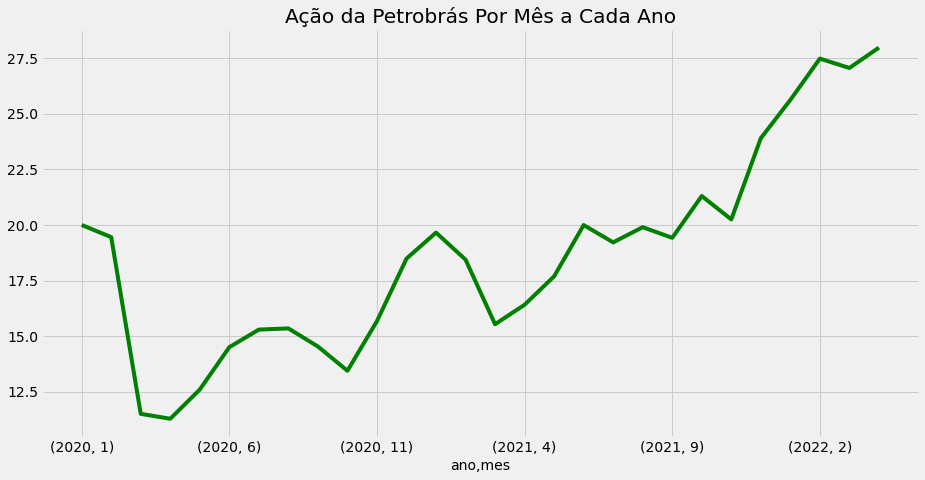

In [15]:
# Calcular a média mensal por ano
plt.figure(figsize=(14, 7))
media_mensal = petr4.groupby(['ano','mes'])['High'].mean()
media_mensal.plot(title = "Ação da Petrobrás Por Mês a Cada Ano", fontsize = 14, color = 'green');

**Tendência de alta com o passar dos meses**

### Modelo Aditivo (sazonalidade constante) X Modelo Multiplicativo (sazonalidade crescente)

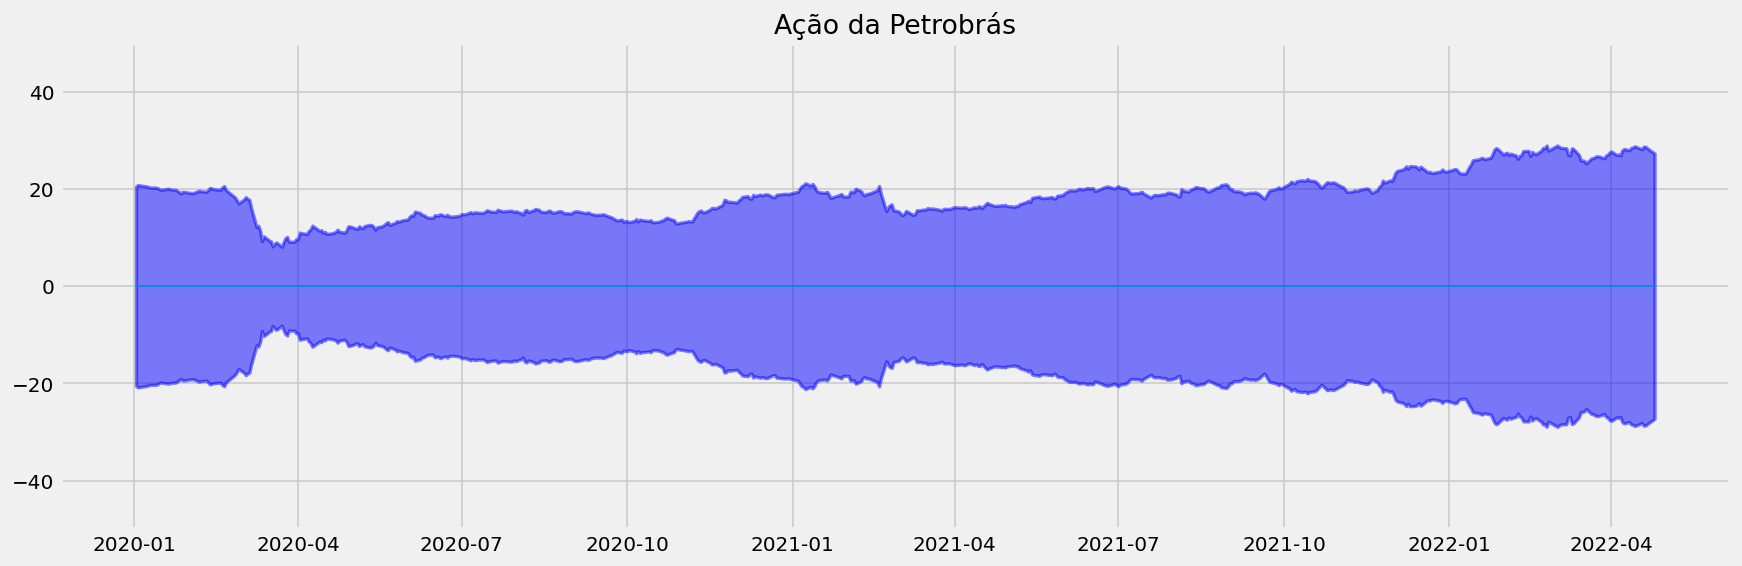

In [16]:
#Grafico de linha para verificar a variação nos dados em relação ao tempo

# Prepara os dados
x = petr4.index.values
y1 = petr4['High'].values


# Plot

# Área de plotagem
fig, ax = plt.subplots(1, 1, figsize = (16,5), dpi = 120)

# Preenchimento do gráfico
plt.fill_between(x, y1 = y1, y2 = -y1, alpha = 0.5, linewidth = 2, color = 'blue')


# Limites do eixo y
plt.ylim(-50, 50)


# Título
plt.title('Ação da Petrobrás', fontsize = 16)


# Limite das linhas
plt.hlines(y = 0, xmin = np.min(petr4.index), xmax = np.max(petr4.index), linewidth = 1);


# Mostra o gráfico
plt.show()

**A Série Temporal não tem uma clareza nos dados para saber se a sazonalidade é aditiva ou multiplicativa, o correto é testar as 2 formas**

## Pré-Processamento

- Vamos dividir os dados em treino, teste e validação 


- Em série temporal os dados são separados em ordem cronológica

In [17]:
# Separar os dados em treino, teste e validação
df_treino = petr4.iloc[0:420]
df_valid = petr4.iloc[420:500]
df_teste = petr4.iloc[500:]


**Dados separados para modelagem**

# Modelagem:

- ## Versão 1 do modelo - Simple Exponential Smoothing

- A função SimpleExpSmoothing() recebe os dados de treino no formato de array numpy


- A função fit() faz o treinamento


- O hiperparâmetro smoothing_level define o nível de suavização exponencial na série


- O hiperparâmetro optimized define se teremos ou não otimização 

In [18]:
#Treinar o modelo
import statsmodels
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing 
import warnings
warnings.filterwarnings('ignore')

#modelo 1
modelo_v1 = SimpleExpSmoothing(np.asarray(df_treino['High'])).fit(smoothing_level = 0.1, optimized = True) 

**Foram testados vários valores do parâmetro smoothing_level, e o melhor encontrado foi o valor de: 0.1**

In [19]:
# Previsões com o Modelo
import warnings
warnings.filterwarnings('ignore')

df_valid['previsoes_v1'] = modelo_v1.forecast(len(df_valid)) 

In [20]:
# Valor real e valor "previsto"
df_valid[['High', 'previsoes_v1']].head()

,High,previsoes_v1
Date,,
2021-09-13,19.269581,19.722895
2021-09-14,19.167355,19.722895
2021-09-15,19.320694,19.722895
2021-09-16,19.160054,19.722895
2021-09-17,18.999414,19.722895


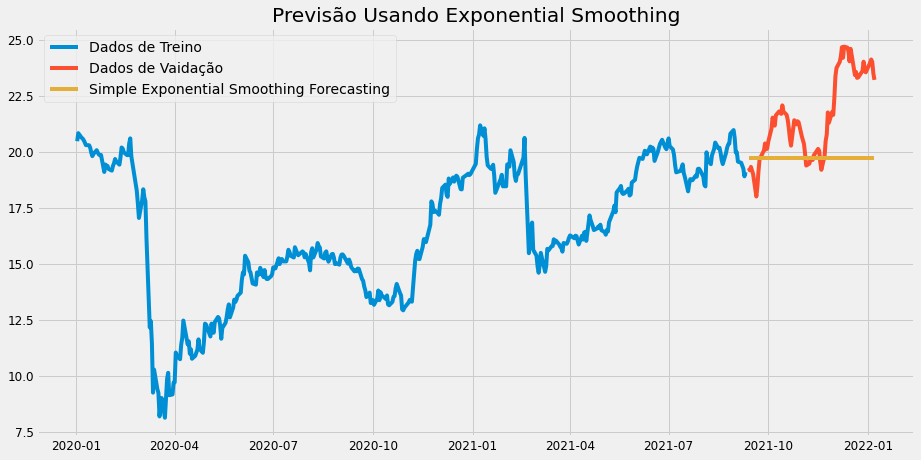

In [21]:
# Plot
plt.figure(figsize=(14, 7))
plt.title("Previsão Usando Exponential Smoothing") 
plt.plot(df_treino['High'], label = 'Dados de Treino')
plt.plot(df_valid['High'], label = 'Dados de Vaidação')
plt.plot(df_valid['previsoes_v1'], label = 'Simple Exponential Smoothing Forecasting') 
plt.legend(loc = 'best') 
plt.show()

**Como o algorítimo Simple Exponential Smoothing não leva em conta a sazonalidade e a tendência, podemos observar um resultado ruim, pois a série tem tendência e sazonalidade**

### Calcular o erro usando RMSE

In [22]:
# Define valor real e valor previsto
y_true = df_valid.High
y_pred = df_valid.previsoes_v1

# Calcula o erro usando RMSE (Root Mean Squared Error)
metrica_rmse1 = sqrt(mean_squared_error(y_true, y_pred)) 
print(metrica_rmse1)

2.583741843779883


**Nosso objetivo é reduzir o máximo a métrica RMSE, pois ela indica a taxa de erro do modelo**

## Versão 2 do modelo - Double Exponential Smoothings

- Ao usar o hiperparâmetro trend, definimos o método Double Exponential Smoothing.


- Testar a série aditiva e Multiplicativa

In [23]:
#Treinar os modelos
modelo_v2_add = ExponentialSmoothing(np.asarray(df_treino['High']), trend = 'additive').fit(smoothing_level = 0.1, 
                                                                                         optimized = True) 

modelo_v2_mult = ExponentialSmoothing(np.asarray(df_treino['High']), trend = 'multiplicative').fit(smoothing_level = 0.1, 
                                                                                         optimized = True)

**Foram testados vários valores do parâmetro smoothing_level, e o melhor encontrado foi o valor de: 0.1**

In [24]:
# Previsões com os Modelos

df_valid['previsoes_v2_add'] = modelo_v2_add.forecast(len(df_valid))

df_valid['previsoes_v2_mult'] = modelo_v2_mult.forecast(len(df_valid))

In [25]:
# Valor real e valor "previsto"

df_valid[['High', 'previsoes_v2_add', 'previsoes_v2_mult']].head()

,High,previsoes_v2_add,previsoes_v2_mult
Date,,,
2021-09-13,19.269581,20.064595,20.076329
2021-09-14,19.167355,20.079474,20.092109
2021-09-15,19.320694,20.094353,20.107901
2021-09-16,19.160054,20.109232,20.123706
2021-09-17,18.999414,20.124111,20.139523


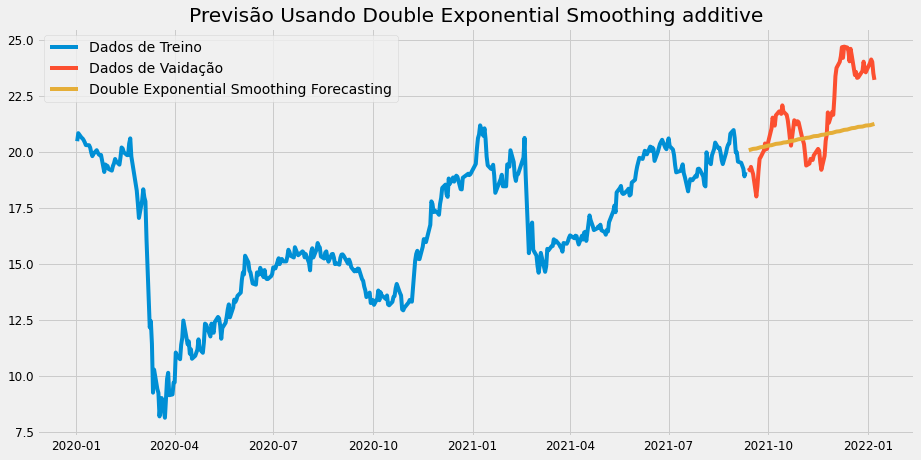

In [26]:
# Plot previsoes_v2_add
plt.figure(figsize=(14, 7))
plt.title("Previsão Usando Double Exponential Smoothing additive") 
plt.plot(df_treino['High'], label = 'Dados de Treino')
plt.plot(df_valid['High'], label = 'Dados de Vaidação')
plt.plot(df_valid['previsoes_v2_add'], label = 'Double Exponential Smoothing Forecasting') 
plt.legend(loc = 'best') 
plt.show()

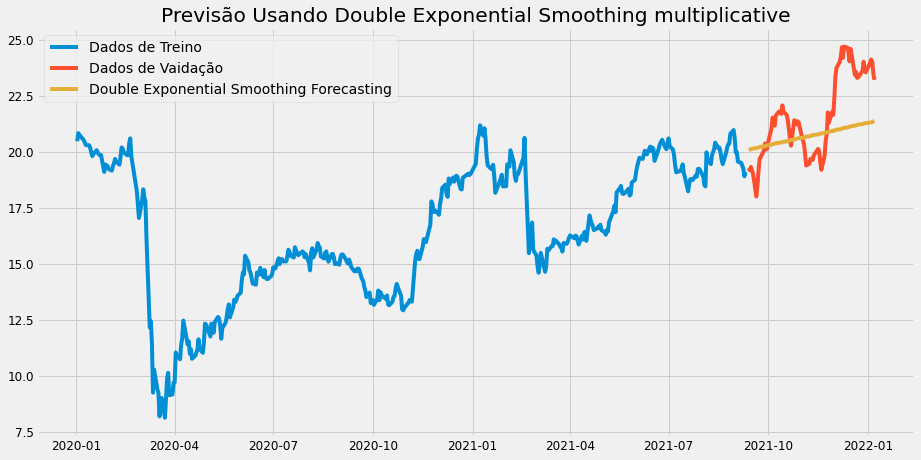

In [27]:
# Plot previsoes_v2_mult
plt.figure(figsize=(14, 7))
plt.title("Previsão Usando Double Exponential Smoothing multiplicative") 
plt.plot(df_treino['High'], label = 'Dados de Treino')
plt.plot(df_valid['High'], label = 'Dados de Vaidação')
plt.plot(df_valid['previsoes_v2_mult'], label = 'Double Exponential Smoothing Forecasting') 
plt.legend(loc = 'best') 
plt.show()

**Note que graficamente não há diferença significativa entre os modelos aditivo e multiplicativo**

### Calcular o erro usando RMSE

In [28]:
# Define valor real e valor previsto
y_true = df_valid.High
y_pred_add = df_valid.previsoes_v2_add
y_pred_mult = df_valid.previsoes_v2_mult

# Calcula o erro do modelo add usando RMSE (Root Mean Squared Error)
metrica_rmse2 = sqrt(mean_squared_error(y_true, y_pred_add)) 
print(f'Modelo additive:       {metrica_rmse2}')

# Calcula o erro do modelo mult usando RMSE (Root Mean Squared Error)
metrica_rmse21 = sqrt(mean_squared_error(y_true, y_pred_mult)) 
print(f'Modelo multiplicative: {metrica_rmse21}')

Modelo additive:       1.813942478255241
Modelo multiplicative: 1.7652001646605286


**Não há diferença significativa entre os modelos com parâmetro 'additive' e 'multiplicative'**

## Versão 3 do modelo - Triple Exponential Smoothing

- Ao usar o hiperparâmetro trend e seasonal, definimos o método Triple Exponential Smoothing.

In [29]:
#Treinar o modelo
modelo_v3 = ExponentialSmoothing(np.asarray(df_treino['High']), 
                                 trend = 'multiplicative',seasonal='multiplicative',
                                 seasonal_periods=36).fit(smoothing_level =0.1,optimized = True) 

In [30]:
# Previsões com os Modelos

df_valid['previsoes_v3'] = modelo_v3.forecast(len(df_valid))

In [31]:
# Valor real e valor "previsto"

df_valid[['High', 'previsoes_v3']].head()

,High,previsoes_v3
Date,,
2021-09-13,19.269581,20.119475
2021-09-14,19.167355,20.388769
2021-09-15,19.320694,20.526829
2021-09-16,19.160054,20.323872
2021-09-17,18.999414,20.022681


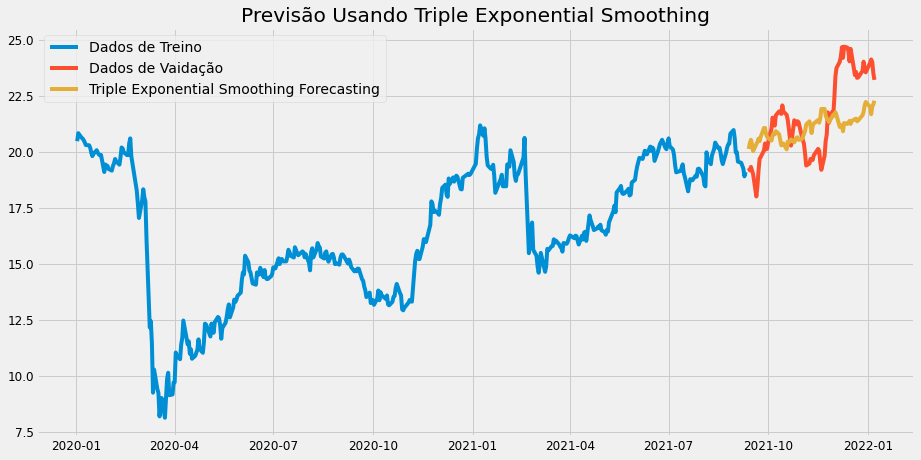

In [32]:
# Plot previsoes_v3
plt.figure(figsize=(14, 7))
plt.title("Previsão Usando Triple Exponential Smoothing") 
plt.plot(df_treino['High'], label = 'Dados de Treino')
plt.plot(df_valid['High'], label = 'Dados de Vaidação')
plt.plot(df_valid['previsoes_v3'], label = 'Triple Exponential Smoothing Forecasting') 
plt.legend(loc = 'best') 
plt.show()

**Note que agora a previsão tem sazonalidade e tendência**

### Calcula o erro usando RMSE

In [33]:
# Define valor real e valor previsto
y_true = df_valid.High
y_pred = df_valid.previsoes_v3

# Calcula o erro usando RMSE (Root Mean Squared Error)
metrica_rmse3 = sqrt(mean_squared_error(y_true, y_pred)) 
print(metrica_rmse3)

1.6943806013496832


**Houve uma melhora em relação ao modelo Double Exponential Smoothing**

# Comparação entre todos os modelos

In [34]:

metrics = pd.Series(metrica_rmse1,index=['Valores'])
metrics = pd.DataFrame(metrics,columns=['Exponential Smoothing'])
metrics['Double Exponential Smoothing Add'] = metrica_rmse2
metrics['Double Exponential Smoothing Mult'] = metrica_rmse21
metrics['Triple Exponential Smoothing'] = metrica_rmse3
metrics = metrics.T
metrics

,Valores
Exponential Smoothing,2.583742
Double Exponential Smoothing Add,1.813942
Double Exponential Smoothing Mult,1.765200
Triple Exponential Smoothing,1.694381


# Conclusão:

**Podemos notar que para esse conjunto de dados e para as métricas usadas para construção do algorítimo, o melhor modelo foi o Triple Exponential Smoothing, pois esse algorítimo leva em consideração a tendência e Sazonalidade da série temporal**